# Import Library

In [1]:
!pip install seaborn
!pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Read csv File

In [2]:
df = pd.read_csv('cars.csv', encoding="ISO-8859-1")
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


# Data Preprocessing

In [3]:
df.isnull().sum()

carID            0
brand           18
model            0
year             0
transmission     0
mileage          6
fuelType        17
tax              0
mpg             12
engineSize       8
price            0
dtype: int64

In [4]:
df['model'] = df['model'].astype(str)
df['model'] = df['model'].str.strip()


df.loc[df['model'] == 'Arteon', 'brand'] = df['brand'].fillna('vw')
df.loc[df['model'] == 'Beetle', 'brand'] = df['brand'].fillna('vw')
df.loc[df['model'] == 'i3', 'brand'] = df['brand'].fillna('bmw')
df.loc[df['model'] == 'Rapid', 'brand'] = df['brand'].fillna('skoda')
df.loc[df['model'] == 'Scala', 'brand'] = df['brand'].fillna('skoda')
df.loc[df['model'] == 'IX20', 'brand'] = df['brand'].fillna('hyundi')
df.loc[df['model'] == 'IX35', 'brand'] = df['brand'].fillna('hyundi')
df.loc[df['model'] == 'Caravelle', 'brand'] = df['brand'].fillna('vw')
df.loc[df['model'] == 'Yeti', 'brand'] = df['brand'].fillna('skoda')
df.loc[df['model'] == 'KA', 'brand'] = df['brand'].fillna('ford')
df.loc[df['model'] == 'Z3', 'brand'] = df['brand'].fillna('bmw')
df.loc[df['model'] == 'Santa Fe', 'brand'] = df['brand'].fillna('hyundi')
df.loc[df['model'] == 'X4', 'brand'] = df['brand'].fillna('bmw')
df.loc[df['model'] == 'RS6', 'brand'] = df['brand'].fillna('audi')
df.loc[df['model'] == 'I800', 'brand'] = df['brand'].fillna('hyundi')
df.loc[df['model'] == 'Combo Life', 'brand'] = df['brand'].fillna('vauxhall')
df.loc[df['model'] == 'SLK', 'brand'] = df['brand'].fillna('merc')


df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['mpg'].fillna(df['mpg'].mean(), inplace=True)
df['engineSize'].fillna(df['engineSize'].mean(), inplace=True)


df['fuelType'].fillna(df['fuelType'].mode()[0], inplace=True)

In [5]:
df.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [6]:
df.dropna(inplace= True)
df.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [7]:
df.dtypes

carID             int64
brand            object
model            object
year              int64
transmission     object
mileage         float64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [8]:
df['brand'].unique()

array(['hyundi', 'vauxhall', 'audi', 'vw', 'skoda', 'merc', 'toyota',
       'bmw', 'ford'], dtype=object)

In [9]:
df.replace('bmw', 'BMW', inplace= True)
df.replace('hyundi', 'Hyundai', inplace= True)
df.replace('vauxhall', 'Vauxhall', inplace= True)
df.replace('audi', 'Audi', inplace= True)
df.replace('vw', 'VW', inplace= True)
df.replace('skoda', 'Skoda', inplace= True)
df.replace('merc', 'Mercedes', inplace= True)
df.replace('toyota', 'Toyota', inplace= True)
df.replace('ford', 'Ford', inplace= True)

In [10]:
df.drop('carID', axis=1, inplace=True)

In [11]:
df.duplicated().sum()

31

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.rename(columns={'brand': 'Brand'}, inplace=True)
df.rename(columns={'model': 'Model'}, inplace=True)
df.rename(columns={'year': 'Year'}, inplace=True)
df.rename(columns={'transmission': 'Transmission'}, inplace=True)
df.rename(columns={'mileage': 'Mileage'}, inplace=True)
df.rename(columns={'fuelType': 'Fuel Type'}, inplace=True)
df.rename(columns={'tax': 'Tax'}, inplace=True)
df.rename(columns={'mpg': 'MPG'}, inplace=True)
df.rename(columns={'engineSize': 'Engine Size'}, inplace=True)
df.rename(columns={'price': 'Price'}, inplace=True)

In [15]:
df.head()

,Brand,Model,Year,Transmission,Mileage,Fuel Type,Tax,MPG,Engine Size,Price
0,Hyundai,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,Vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,Audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,VW,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,Skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


# Data Analysis

In [16]:
df.loc[df['Price'] == df['Price'].max(), ['Model', "Brand",'Transmission','Fuel Type', 'Year']]

,Model,Brand,Transmission,Fuel Type,Year
3897,R8,Audi,Semi-Auto,Petrol,2020


In [17]:
df.loc[df['Price'] == df['Price'].min(), ['Model', "Brand",'Transmission','Fuel Type', 'Year']]

,Model,Brand,Transmission,Fuel Type,Year
3975,Agila,Vauxhall,Manual,Petrol,2003


In [18]:
df.loc[df['Mileage'] == df['Mileage'].max(), ['Model', "Brand",'Transmission','Fuel Type', 'Year']]

,Model,Brand,Transmission,Fuel Type,Year
2500,V Class,Mercedes,Automatic,Diesel,2010


In [19]:
df.loc[df['Tax'] == df['Tax'].max(), ['Model', "Brand",'Transmission','Fuel Type', 'Year']]

,Model,Brand,Transmission,Fuel Type,Year
84,Mustang,Ford,Semi-Auto,Petrol,2017
526,M3,BMW,Manual,Petrol,2009
1878,G Class,Mercedes,Automatic,Diesel,2013
3994,M Class,Mercedes,Semi-Auto,Petrol,2014


In [20]:
df.loc[df['MPG'] == df['MPG'].max(), ['Model', "Brand",'Transmission','Fuel Type', 'Year']]

,Model,Brand,Transmission,Fuel Type,Year
50,i3,BMW,Automatic,Hybrid,2017
110,i3,BMW,Automatic,Other,2016
161,i3,BMW,Automatic,Hybrid,2017
256,i3,BMW,Automatic,Hybrid,2017
767,i3,BMW,Automatic,Other,2016
969,i3,BMW,Automatic,Electric,2016
1005,i3,BMW,Automatic,Hybrid,2016
1053,i3,BMW,Automatic,Electric,2015
1374,i3,BMW,Automatic,Hybrid,2016
1544,i3,BMW,Automatic,Other,2017


In [21]:
df.groupby(['Brand','Transmission'])[['Price']].sum()

Price
Brand    Transmission          
Audi     Automatic      8165260
         Manual          162834
         Semi-Auto      6191428
BMW      Automatic      7985353
         Manual          442093
         Semi-Auto     15400290
Ford     Automatic      2281233
         Manual         7639705
         Semi-Auto      2230334
Hyundai  Automatic      1776751
         Manual         3317938
         Semi-Auto      2283780
Mercedes Automatic     13237283
         Manual         1352744
         Semi-Auto      9150852
Skoda    Automatic       782829
         Manual         3101347
         Other            15999
         Semi-Auto      1883281
Toyota   Automatic      4688555
         Manual         2463668
         Semi-Auto      1249351
VW       Automatic      6056848
         Manual         4164070
         Semi-Auto      6450117
Vauxhall Automatic       330969
         Manual         2879945
         Semi-Auto        33560

In [22]:
df.groupby(['Brand'])[['Mileage']].mean().round(2)

,Mileage
Brand,
Audi,23049.33
BMW,19636.94
Ford,26269.13
Hyundai,29386.73
Mercedes,28005.94
Skoda,17941.05
Toyota,30647.16
VW,24585.82
Vauxhall,23128.26


In [23]:
# df.to_csv('Cars sales.csv', index= False)

# Data Encoding

In [24]:
!pip install xgboost
!pip install scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install joblib
import joblib


# ترميز البيانات الفئوية
encoder_brand = LabelEncoder()
encoder_model = LabelEncoder()

# ترميز الأعمدة الفئوية
df['Brand'] = encoder_brand.fit_transform(df['Brand'])
df['Model'] = encoder_model.fit_transform(df['Model'])

# حفظ الـ LabelEncoders
joblib.dump(encoder_brand, "label_encoder_brand.pkl")
joblib.dump(encoder_model, "label_encoder_model.pkl")
print("تم حفظ LabelEncoders للـ Brand و Model.")

# تحجيم الأعمدة العددية
scaler = StandardScaler()
columns_to_scale = ['Year', 'Mileage', 'Tax', 'MPG', 'Engine Size']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# حفظ الـ Scaler
joblib.dump(scaler, "scaler.pkl")
print("تم حفظ Scaler.")

# إعداد البيانات للتدريب
Y = df['Price']
X = df[['Brand', 'Model', 'Year', 'Mileage', 'Tax', 'MPG', 'Engine Size']]

# اختيار الميزات باستخدام SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)  # اختيار أفضل 5 ميزات
X_selected = selector.fit_transform(X, Y)

# حفظ الـ Feature Selector
joblib.dump(selector, "feature_selector.pkl")
print("تم حفظ Feature Selector.")

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
print(f"عدد عينات التدريب: {X_train.shape[0]}, عدد عينات الاختبار: {X_test.shape[0]}")

# تعريف النماذج المختلفة
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# تدريب وتقييم النماذج
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f"{model_name} MAE: {mae:.2f}, R²: {r2:.2f}")

# اختيار أفضل نموذج (XGBoost في هذه الحالة)
xgb_best_model = models["XGBoost"]
joblib.dump(xgb_best_model, "xgb_car_sales_model.pkl")
print("تم حفظ نموذج XGBoost كـ 'xgb_car_sales_model.pkl'.")


تم حفظ LabelEncoders للـ Brand و Model.
تم حفظ Scaler.
تم حفظ Feature Selector.
عدد عينات التدريب: 3943, عدد عينات الاختبار: 986
Linear Regression MAE: 6321.17, R²: 0.67
XGBoost MAE: 2370.02, R²: 0.94
Random Forest MAE: 2470.59, R²: 0.94
Gradient Boosting MAE: 3298.10, R²: 0.90
تم حفظ نموذج XGBoost كـ 'xgb_car_sales_model.pkl'.


### Compare performance: Try different models (e.g. Random Forest, Linear Regression, XGBoost, Gradient Boosting) and compare the MAE and R² of each. The model that gives you the lowest MAE and the highest R² is best for you.

### After comparing the results between the five models, here is a breakdown of their performance:
#### XGBoost is the best based on the results, achieving the lowest absolute error and highest precision (R²).
#### Random Forest comes in second and performs very close to XGBoost, and may be a good choice if training speed or interpretability matters to you.
#### Gradient Boosting Regressor comes in third, while Linear Regression is the weakest.
#### So, if you are looking for the highest accuracy and lowest absolute error, XGBoost is the best choice

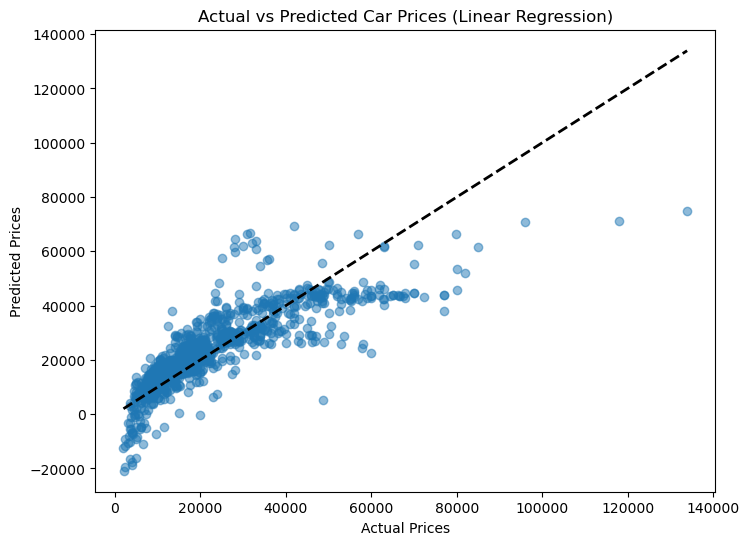

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, models["Linear Regression"].predict(X_test), alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices (Linear Regression)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()

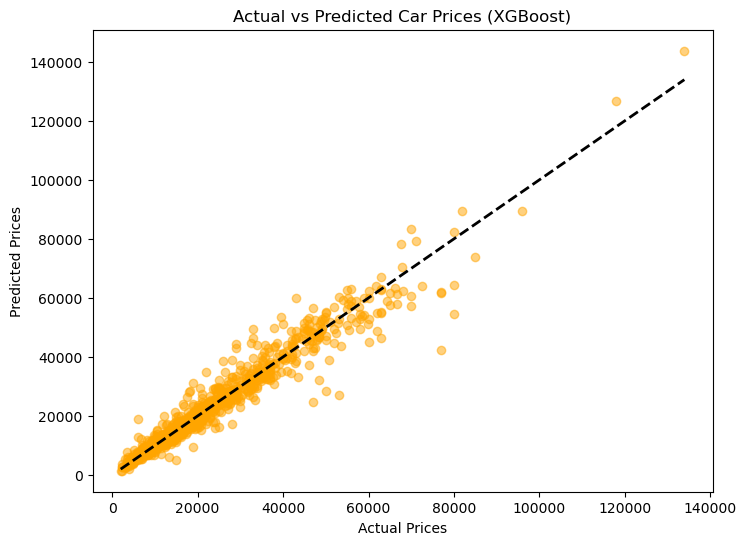

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, models["XGBoost"].predict(X_test), alpha=0.5, color='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices (XGBoost)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()

In [28]:
df.head()

,Brand,Model,Year,Transmission,Mileage,Fuel Type,Tax,MPG,Engine Size,Price
0,3,69,0.787119,Semi-Auto,-0.851653,Diesel,-0.086429,-0.296548,0.095928,31995
1,8,30,-0.599358,Manual,0.933753,Diesel,-0.329343,0.269937,-0.158273,7700
2,0,58,0.787119,Automatic,-0.813693,Petrol,-0.086429,-0.595139,0.985633,58990
3,7,71,-0.252739,Automatic,-0.188983,Diesel,-1.483182,0.200173,-0.158273,12999
4,5,70,1.133739,Semi-Auto,-0.878406,Petrol,-0.086429,-0.092837,-1.429279,16990
